In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df.sample(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
134,6.1,2.6,5.6,1.4,2
83,6.0,2.7,5.1,1.6,1
101,5.8,2.7,5.1,1.9,2
72,6.3,2.5,4.9,1.5,1
132,6.4,2.8,5.6,2.2,2


In [ ]:
print(f"Shape: {iris_df.shape[0]} rows × {iris_df.shape[1]} columns")
print('-'*84+'\n')
print(iris_df.info())
print('-'*84)
display(iris_df.describe())

In [3]:
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:,0:-1]
y = iris_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:\n--> Shape: {X_train.shape[0]} rows × {X_train.shape[1]} columns")
print(f"X_test:\n--> Shape: {X_test.shape[0]} rows × {X_test.shape[1]} columns")
print(f"y_train:\n--> Shape: {y_train.shape}")
print(f"y_test:\n--> Shape: {y_test.shape}")

X_train:
--> Shape: 120 rows × 4 columns
X_test:
--> Shape: 30 rows × 4 columns
y_train:
--> Shape: (120,)
y_test:
--> Shape: (30,)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline_steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature scaling
    ('classifier', RandomForestClassifier(min_samples_leaf=5))  # Step 2: Classification mode
]

# Build pipeline
pipeline = Pipeline(pipeline_steps)

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5)
print("CV Accuracy:", scores)
print("Mean:", scores.mean(), "Std:", scores.std())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define candidate models
models = {
    "LogReg": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"{name}: Mean={scores.mean():.2f}, Std={scores.std():.3f}")


In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_leaf": [1, 3, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV score:", round(grid.best_score_,2))


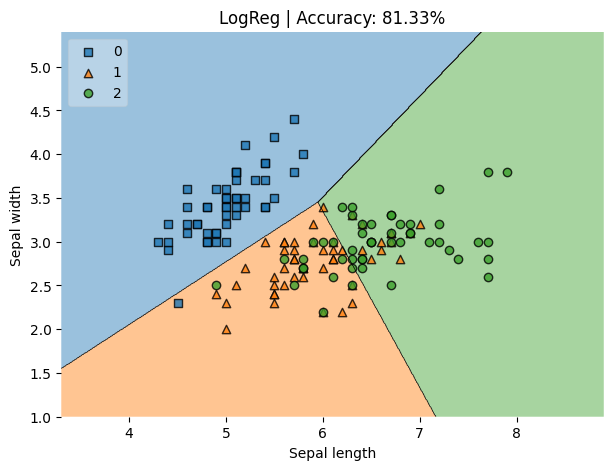

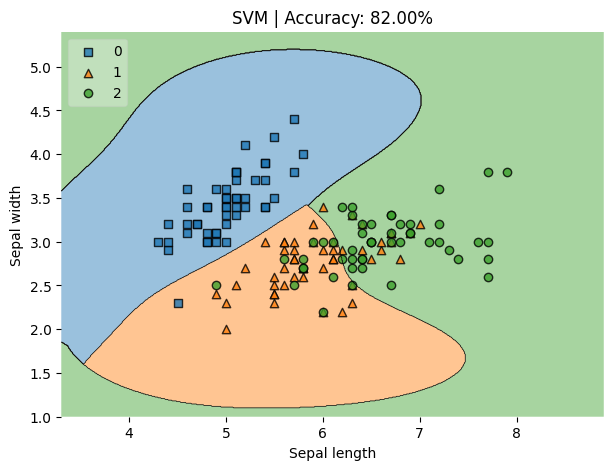

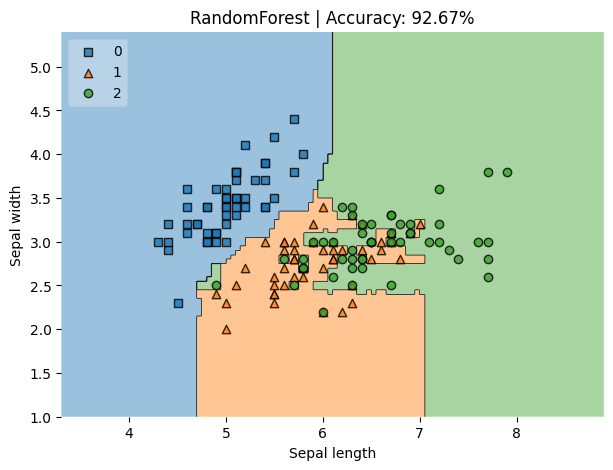

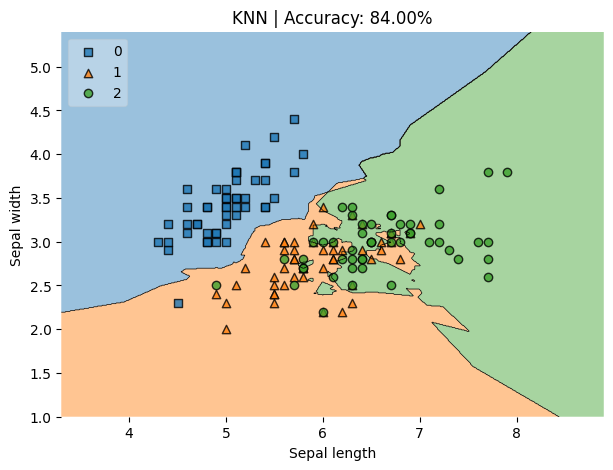

In [9]:
from mlxtend.plotting import plot_decision_regions

X = iris_df.iloc[:, [0, 1]].values  # sepal length and sepal width
y = iris_df.iloc[:, -1].values

models = {
    "LogReg": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=1,
        n_estimators=100
    ),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    pipeline.fit(X, y)

    # Calculate accuracy on training data
    acc = pipeline.score(X, y) * 100

    fig, ax = plt.subplots(figsize=(7, 5))
    plot_decision_regions(X, y, clf=pipeline, legend=2, ax=ax)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f'{name} | Accuracy: {acc:.2f}%')
    plt.show()

## Testing my own custom decision regions plotting utility

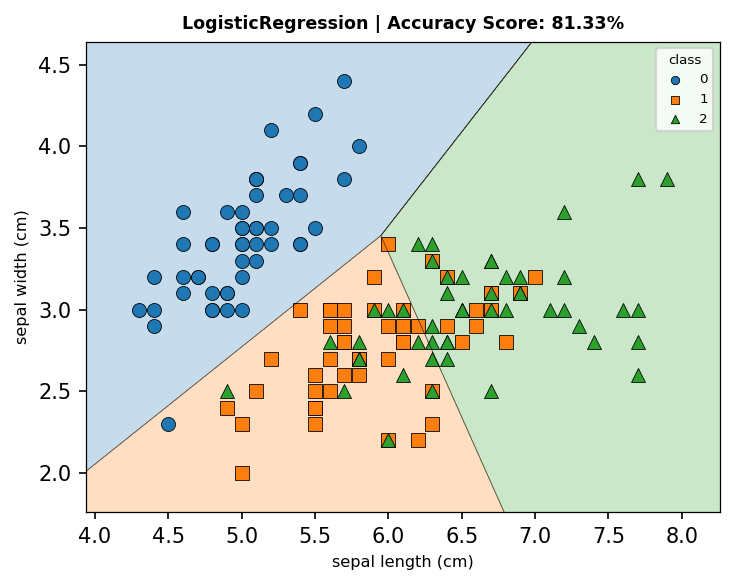

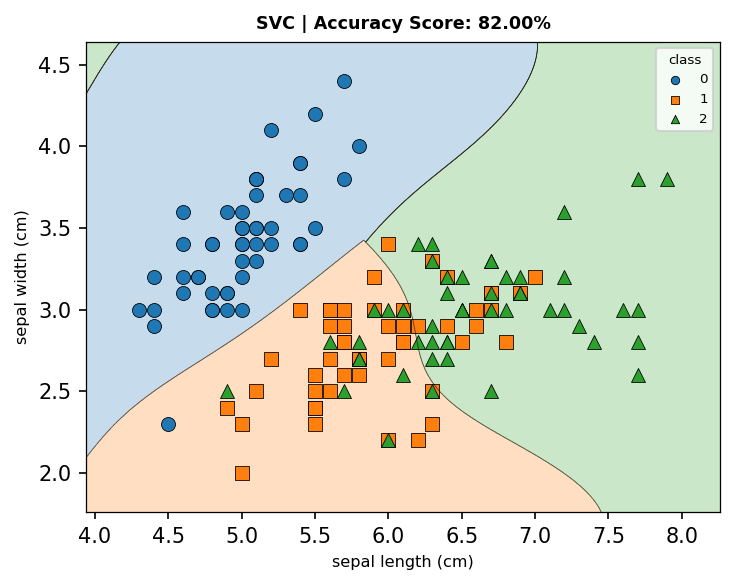

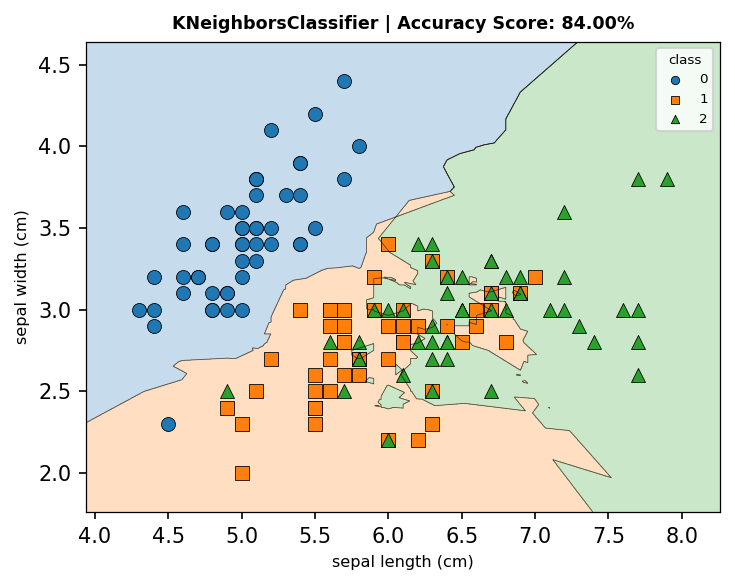

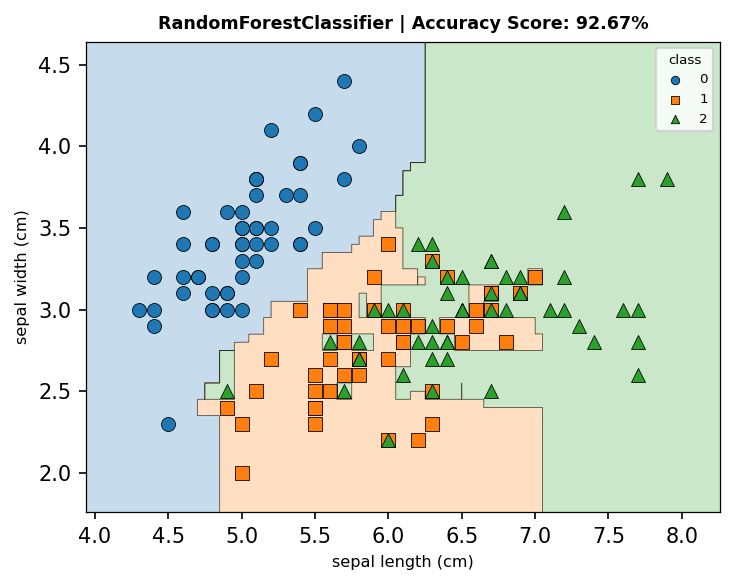

<Axes: title={'center': 'RandomForestClassifier | Accuracy Score: 92.67%'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

In [8]:
# importing required libs again to run in one go

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from viz.decision_boundary_plot import plot_decision_regions

X = iris_df.iloc[:, 0:-1]
y = iris_df.iloc[:, -1]

# 1) Logistic Regression
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])
plot_decision_regions(
    logreg_pipe, X, y,
    features=(0, 1),
    fit_on="full",   # or (X_train, y_train) if you want
    title_prefix="Logistic Regression (petal length vs width)",
    figsize=(5,4),
    grid_step=0.001
)

# 2) SVM with RBF kernel
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True))
])
plot_decision_regions(
    svm_pipe, X, y,
    features=(0, 1),
    fit_on="full",
    title_prefix="SVM RBF (petal length vs width)",
    figsize=(5,4),
    grid_step=0.001
)

# 3) KNN
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])
plot_decision_regions(
    knn_pipe, X, y,
    features=(0, 1),
    fit_on="full",
    title_prefix="KNN k=5 (petal length vs width)",
    figsize=(5,4),
    grid_step=0.001
)

# 4) Random Forest
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])
plot_decision_regions(
    rf_pipe, X, y,
    features=(0, 1),
    fit_on="full",
    title_prefix="Random Forest (petal length vs width)",
    figsize=(5,4),
    grid_step=0.001
)


In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=200),
    X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="CV")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Validation curve: vary hyperparameter
param_range = [1, 3, 5, 7, 9]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X, y, param_name="n_neighbors", param_range=param_range, cv=5
)

plt.plot(param_range, train_scores.mean(axis=1), label="Train")
plt.plot(param_range, test_scores.mean(axis=1), label="CV")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
